## GAN2
이번에는 무작위의 숫자가 아닌 원하는 숫자를 지정해 생성하는 모델을 만들어 봅시다.

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

total_epoch = 100
batch_size = 100
n_hidden = 256
n_input = 28*28
n_noise = 128
n_class = 10

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_class])
Z = tf.placeholder(tf.float32, [None, n_noise])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


이전과 달리 플레이스홀더값에 Y값을 추가 했습니다. 지도 학습때문이 아닌 노이즈와 실제 이미지 각각에 해당하는 숫자를 힌트로 넣어주는 용도로 사용할것입니다.

In [0]:
def generator(noise, labels):
  with tf.variable_scope('generator'):
      inputs = tf.concat([noise,labels],1)
      hidden = tf.layers.dense(inputs, n_hidden,activation=tf.nn.relu)
      output = tf.layers.dense(hidden, n_input, activation=tf.nn.sigmoid)
  return output

생성자 신경망을 만들어 봅시다. 이번에는 변수를 선언하지 않고 ``tf.layer``를 사용해 봅시다. ``tf.layer``을 사용하면 변수를 선언하지 않고 다음과 같이 ``tf.variable_scope``를 이용해 스코프를 지정해 줄수있고 이렇게 하면 나중에 이 스코프에 해당하는 변수들만 따로 불러올 수 있습니다.   
그러다음 ``tf.contact``함수를 이용해 은닉층을 만들고 출력층역시 만들어 줍니다.

In [0]:
def discriminator(inputs,labels,reuse = None):
  with tf.variable_scope('discriminator') as scope:
    if reuse:
      scope.reuse_variables()

    inputs = tf.concat([inputs, labels],1)
    hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
    output = tf.layers.dense(hidden,1,activation= None)
  return output

구분자 신경망 역시 생성자 신경망과 같이 만들지만 여기서는 ``scope.reuse_variables``를 사용해 이전에 사용한 변수를 재사용해봅시다.     
추가로 여기는 출력값에 활성화 함수를 사용하지 않았는데 이는 추후 손실값 계산에 ``sigmoid_cross_entropy_with_logits``함수를 이용하기 위함입니다.

In [0]:
def get_noise(batch_size, n_noise):
  return np.random.uniform(-1.,1.,size=[batch_size, n_noise])


노이즈 생성 함수는 노이즈를 균등분포로 생성하도록 만들었습니다.

In [0]:
G = generator(Z,Y)
D_real = discriminator(X,Y)
D_gene = discriminator(G, Y, True) ##D_real에서 사용한 변수를 재활용 하기 위해 reuse옵션을 True로 설정합니다.

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
loss_D_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = D_real, labels= tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene, labels = tf.zeros_like(D_gene)))
loss_D = loss_D_real + loss_D_gene

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
loss_G = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits =D_gene, labels = tf.ones_like(D_gene)))

In [0]:
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                           scope='discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                           scope='generator')

train_D = tf.train.AdamOptimizer().minimize(loss_D,
                                            var_list=vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G,
                                            var_list=vars_G)

마지막으로 텐서플로가 제공하는 ``tf.get_collection``함수를 이용해 discriminator와 generator 스코프에서 사용된 변수들을 가져온뒤, 이 변수들을 최적화에 사용할 각각의 손실함수와 함께 최적화 함수에 넣어 학습모델 구성을 마무리합니다.

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D, loss_val_G = 0,0


Epoch: 0000 D loss 0.2449 G loss: 3.975


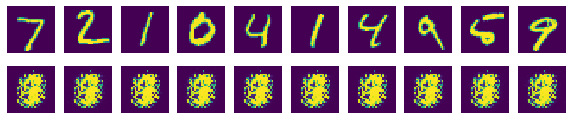

Epoch: 0001 D loss 0.0504 G loss: 5.806
Epoch: 0002 D loss 0.01142 G loss: 6.206
Epoch: 0003 D loss 0.00975 G loss: 7.15
Epoch: 0004 D loss 0.02299 G loss: 7.408
Epoch: 0005 D loss 0.006422 G loss: 7.756
Epoch: 0006 D loss 0.00268 G loss: 9.195
Epoch: 0007 D loss 0.006242 G loss: 12.96
Epoch: 0008 D loss 0.0237 G loss: 8.41
Epoch: 0009 D loss 0.004822 G loss: 7.917


<Figure size 432x288 with 0 Axes>

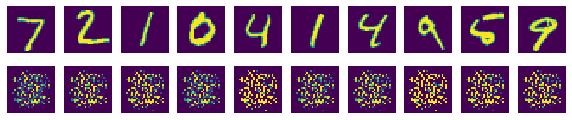

Epoch: 0010 D loss 0.005917 G loss: 8.56
Epoch: 0011 D loss 0.01013 G loss: 8.216
Epoch: 0012 D loss 0.006855 G loss: 7.629
Epoch: 0013 D loss 0.001861 G loss: 9.726
Epoch: 0014 D loss 0.00431 G loss: 7.521
Epoch: 0015 D loss 0.006852 G loss: 9.02
Epoch: 0016 D loss 0.004875 G loss: 7.189
Epoch: 0017 D loss 0.006776 G loss: 9.745
Epoch: 0018 D loss 0.002576 G loss: 9.989
Epoch: 0019 D loss 0.00119 G loss: 13.02


<Figure size 432x288 with 0 Axes>

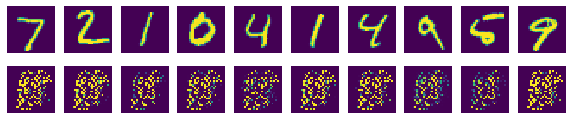

Epoch: 0020 D loss 0.0001585 G loss: 10.05
Epoch: 0021 D loss 0.0003391 G loss: 10.81
Epoch: 0022 D loss 0.001601 G loss: 8.798
Epoch: 0023 D loss 0.002916 G loss: 9.674
Epoch: 0024 D loss 0.001222 G loss: 8.423
Epoch: 0025 D loss 0.001622 G loss: 8.729
Epoch: 0026 D loss 0.001692 G loss: 10.75
Epoch: 0027 D loss 0.001277 G loss: 10.45
Epoch: 0028 D loss 0.003917 G loss: 9.903
Epoch: 0029 D loss 0.0007428 G loss: 10.57


<Figure size 432x288 with 0 Axes>

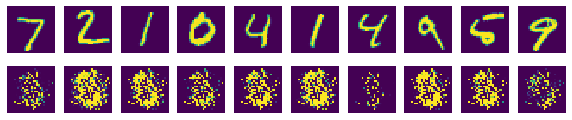

Epoch: 0030 D loss 0.009892 G loss: 9.684
Epoch: 0031 D loss 0.0004174 G loss: 10.8
Epoch: 0032 D loss 0.000987 G loss: 9.826
Epoch: 0033 D loss 0.0041 G loss: 10.37
Epoch: 0034 D loss 0.01095 G loss: 7.278
Epoch: 0035 D loss 0.003411 G loss: 9.172
Epoch: 0036 D loss 0.001427 G loss: 10.16
Epoch: 0037 D loss 0.01022 G loss: 8.816
Epoch: 0038 D loss 0.006949 G loss: 8.835
Epoch: 0039 D loss 0.007283 G loss: 8.613


<Figure size 432x288 with 0 Axes>

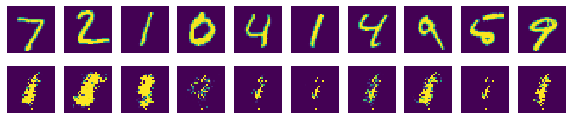

Epoch: 0040 D loss 0.004156 G loss: 9.984
Epoch: 0041 D loss 0.006099 G loss: 8.252
Epoch: 0042 D loss 0.01765 G loss: 8.674
Epoch: 0043 D loss 0.03481 G loss: 8.016
Epoch: 0044 D loss 0.01457 G loss: 7.321
Epoch: 0045 D loss 0.01849 G loss: 7.665
Epoch: 0046 D loss 0.03516 G loss: 9.739
Epoch: 0047 D loss 0.02751 G loss: 7.548
Epoch: 0048 D loss 0.04363 G loss: 7.674
Epoch: 0049 D loss 0.0151 G loss: 8.255


<Figure size 432x288 with 0 Axes>

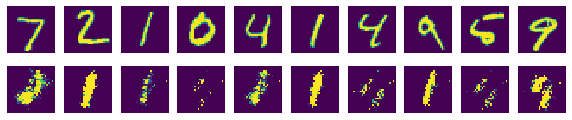

Epoch: 0050 D loss 0.00774 G loss: 9.636
Epoch: 0051 D loss 0.03931 G loss: 8.492
Epoch: 0052 D loss 0.004949 G loss: 9.374
Epoch: 0053 D loss 0.06119 G loss: 7.46
Epoch: 0054 D loss 0.04113 G loss: 8.381
Epoch: 0055 D loss 0.1209 G loss: 8.458
Epoch: 0056 D loss 0.0167 G loss: 9.059
Epoch: 0057 D loss 0.05513 G loss: 8.279
Epoch: 0058 D loss 0.0117 G loss: 7.879
Epoch: 0059 D loss 0.02259 G loss: 9.449


<Figure size 432x288 with 0 Axes>

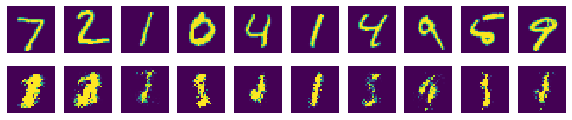

Epoch: 0060 D loss 0.1553 G loss: 6.412
Epoch: 0061 D loss 0.06792 G loss: 8.915
Epoch: 0062 D loss 0.163 G loss: 6.749
Epoch: 0063 D loss 0.05876 G loss: 8.584
Epoch: 0064 D loss 0.1211 G loss: 6.959
Epoch: 0065 D loss 0.1739 G loss: 10.08
Epoch: 0066 D loss 0.06618 G loss: 5.959
Epoch: 0067 D loss 0.09254 G loss: 6.268
Epoch: 0068 D loss 0.2062 G loss: 7.385
Epoch: 0069 D loss 0.1205 G loss: 7.241


<Figure size 432x288 with 0 Axes>

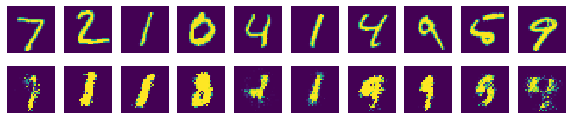

Epoch: 0070 D loss 0.1313 G loss: 6.77
Epoch: 0071 D loss 0.1927 G loss: 5.495
Epoch: 0072 D loss 0.09387 G loss: 6.045
Epoch: 0073 D loss 0.1227 G loss: 5.599
Epoch: 0074 D loss 0.1838 G loss: 6.177
Epoch: 0075 D loss 0.1787 G loss: 5.929
Epoch: 0076 D loss 0.2488 G loss: 5.039
Epoch: 0077 D loss 0.2167 G loss: 5.296
Epoch: 0078 D loss 0.08762 G loss: 5.436
Epoch: 0079 D loss 0.1508 G loss: 5.089


<Figure size 432x288 with 0 Axes>

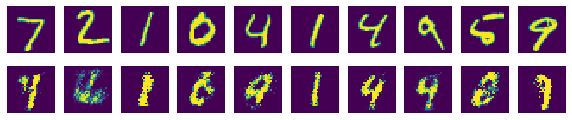

Epoch: 0080 D loss 0.3285 G loss: 4.69
Epoch: 0081 D loss 0.3495 G loss: 4.337
Epoch: 0082 D loss 0.2207 G loss: 5.447
Epoch: 0083 D loss 0.2079 G loss: 5.424
Epoch: 0084 D loss 0.3745 G loss: 4.268
Epoch: 0085 D loss 0.2208 G loss: 5.361
Epoch: 0086 D loss 0.3869 G loss: 5.134
Epoch: 0087 D loss 0.2074 G loss: 5.005
Epoch: 0088 D loss 0.2105 G loss: 4.993
Epoch: 0089 D loss 0.231 G loss: 5.445


<Figure size 432x288 with 0 Axes>

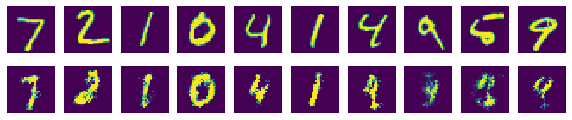

Epoch: 0090 D loss 0.245 G loss: 4.969
Epoch: 0091 D loss 0.3792 G loss: 3.644
Epoch: 0092 D loss 0.2944 G loss: 5.192
Epoch: 0093 D loss 0.3609 G loss: 4.043
Epoch: 0094 D loss 0.3226 G loss: 4.473
Epoch: 0095 D loss 0.269 G loss: 3.666
Epoch: 0096 D loss 0.4156 G loss: 3.544
Epoch: 0097 D loss 0.3152 G loss: 4.239
Epoch: 0098 D loss 0.1813 G loss: 5.298
Epoch: 0099 D loss 0.1864 G loss: 4.792


<Figure size 432x288 with 0 Axes>

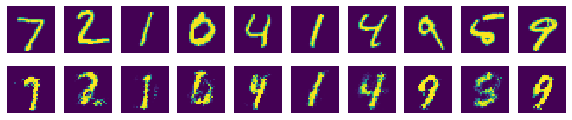

최적화 완료


<Figure size 432x288 with 0 Axes>

In [0]:
for epoch in range(total_epoch):
  for i in range(total_epoch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    noise = get_noise(batch_size, n_noise)

    _, loss_val_D = sess.run([train_D, loss_D], feed_dict = {X: batch_xs, Y: batch_ys, Z: noise})
    _, loss_val_G = sess.run([train_G, loss_G], feed_dict = {Y: batch_ys, Z: noise})

  print('Epoch:','%04d' % epoch, 'D loss {:.4}'.format(loss_val_D), 'G loss: {:.4}'.format(loss_val_G))

  if epoch == 0 or (epoch +1) % 10 == 0:
    sample_size =10
    noise = get_noise(sample_size, n_noise)
    samples = sess.run(G, feed_dict={Y: mnist.test.labels[:sample_size], Z:noise})

    fig, ax = plt.subplots(2, sample_size, figsize = (sample_size,2))
    for i in range(sample_size):
      ax[0][i].set_axis_off()
      ax[1][i].set_axis_off()

      ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
      ax[1][i].imshow(np.reshape(samples[i],(28,28)))
    
    plt.show()
    plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)))
    plt.close(fig)
print('최적화 완료')